## Libraries and versions

### Libraries

In [1]:
python_version = !Python -V #version 3.7.9
import pandas as pd #version 1.2.3
import numpy as np #version 1.19.2
import seaborn as sns #version 0.11.0

#statistic tests
from statsmodels import __version__ as stats_version #version 0.12.2
from statsmodels.stats.proportion import proportion_confint, proportions_chisquare 
from scipy import __version__ as scipy_version #version 1.6.1
from scipy.stats import mannwhitneyu

### Versions

In [2]:
print(f'{python_version[0]}')
print(f'Pandas version: {pd.__version__}')
print(f'Numpy version: {np.__version__}')
print(f'Seaborn version: {sns.__version__}')
print(f'Statsmodels version: {stats_version}')
print(f'Scipy version: {scipy_version}')

Python 3.7.9
Pandas version: 1.2.3
Numpy version: 1.19.2
Seaborn version: 0.11.0
Statsmodels version: 0.12.2
Scipy version: 1.6.1


## Configurations

### Seaborn

In [3]:
sns.set_palette('copper_r')
sns.set_style('darkgrid')

def configuration(graphic_object, title=None, xlabel=None, ylabel=None):
    graphic_object.figure.set_size_inches(18,6)
    graphic_object.set_title(title, color='grey', fontsize=22)
    graphic_object.set_xlabel(xlabel, color='grey', fontsize=18)
    graphic_object.set_ylabel(ylabel, color='grey', fontsize=18)
    graphic_object = graphic_object

In [4]:
import warnings
warnings.filterwarnings("ignore")

## Dataset

In [5]:
dataset = pd.read_csv('train_cleaning.csv')

In [6]:
dataset.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


## Functions

## EDA - Variable y (Segmentation)

### Univariate Analysis

In [7]:
dict_y = {
    'Frequency':dataset['Segmentation'].value_counts().values,
    'Percent':dataset['Segmentation'].value_counts(normalize=True).round(3).values * 100
}

df_segmentation = pd.DataFrame(dict_y, index=dataset['Segmentation'].value_counts().index)
df_segmentation

,Frequency,Percent
D,2127,27.7
C,1896,24.7
A,1867,24.3
B,1779,23.2


- the division of all clients is almost equal for all variable Segmentation (1/4 for each one), Segmentation D is 4.5pp bigger   then B
- what is the criteria for choose one Segmentation?

## Multi variate (categoric)

In [8]:
#create a DataFrame using crosstab for all variables in absolut value
ct_gender = pd.crosstab(index=dataset['Segmentation'], columns=dataset['Gender'])
ct_married = pd.crosstab(index=dataset['Segmentation'], columns=dataset['Ever_Married'])
ct_graduated =pd.crosstab(index=dataset['Segmentation'], columns=dataset['Graduated'])
ct_profession =pd.crosstab(index=dataset['Segmentation'], columns=dataset['Profession'])
ct_score =pd.crosstab(index=dataset['Segmentation'], columns=dataset['Spending_Score'])
ct_var =pd.crosstab(index=dataset['Segmentation'], columns=dataset['Var_1'])

In [9]:
pd.concat([df_segmentation,ct_gender,ct_married,ct_graduated, ct_profession, ct_score, ct_var], axis=1, 
          keys=['Count Values', 'Gender', 'Married', 'Graduated', 'Profession', 'Spending_score','Var_1']).T

D       C       A       B
Count Values   Frequency      2127.0  1896.0  1867.0  1779.0
               Percent          27.7    24.7    24.3    23.2
Gender         Female          890.0   881.0   856.0   825.0
               Male           1237.0  1015.0  1011.0   954.0
Married        No             1552.0   381.0   776.0   468.0
               Yes             575.0  1515.0  1091.0  1311.0
Graduated      No             1349.0   324.0   689.0   494.0
               Yes             778.0  1572.0  1178.0  1285.0
Profession     Artist          135.0  1038.0   546.0   730.0
               Doctor          200.0   138.0   190.0   140.0
               Engineer        171.0    73.0   249.0   181.0
               Entertainment   208.0   144.0   354.0   213.0
               Executive       110.0   175.0   117.0   176.0
               Healthcare      933.0   134.0   105.0    99.0
               Homemaker        86.0    26.0    69.0    53.0
               Lawyer          121.0   135.0   185.0   157.0
               Marketing       163.0    33.0    52.0    30.0
Spending_score Average         126.0   873.0   315.0   559.0
               High            129.0   399.0   255.0   368.0
               Low            1872.0   624.0  1297.0   852.0
Var_1          Cat_1            47.0    26.0    29.0    25.0
               Cat_2           130.0    94.0    82.0    99.0
               Cat_3           240.0   141.0   201.0   179.0
               Cat_4           381.0   103.0   314.0   217.0
               Cat_5            25.0    18.0    18.0    20.0
               Cat_6          1246.0  1469.0  1176.0  1197.0
               Cat_7            58.0    45.0    47.0    42.0

In [22]:
#create a DataFrame using crosstab for all variables in percent
ct_gender = pd.crosstab(index=dataset['Segmentation'], columns=dataset['Gender'], normalize='index').round(3) * 100
ct_married = pd.crosstab(index=dataset['Segmentation'], columns=dataset['Ever_Married'], normalize='index').round(3) * 100
ct_graduated =pd.crosstab(index=dataset['Segmentation'], columns=dataset['Graduated'], normalize='index').round(3) * 100
ct_profession =pd.crosstab(index=dataset['Segmentation'], columns=dataset['Profession'], normalize='index').round(3) * 100
ct_score =pd.crosstab(index=dataset['Segmentation'], columns=dataset['Spending_Score'], normalize='index').round(3) * 100
ct_var =pd.crosstab(index=dataset['Segmentation'], columns=dataset['Var_1'], normalize='index').round(3) * 100

In [23]:
pd.concat([df_segmentation,ct_gender,ct_married,ct_graduated, ct_profession, ct_score, ct_var], axis=1, 
          keys=['Count Values', 'Gender', 'Married', 'Graduated', 'Profession', 'Spending_score', 'Var_1']).T

D       C       A       B
Count Values   Frequency      2127.0  1896.0  1867.0  1779.0
               Percent          27.7    24.7    24.3    23.2
Gender         Female           41.8    46.5    45.8    46.4
               Male             58.2    53.5    54.2    53.6
Married        No               73.0    20.1    41.6    26.3
               Yes              27.0    79.9    58.4    73.7
Graduated      No               63.4    17.1    36.9    27.8
               Yes              36.6    82.9    63.1    72.2
Profession     Artist            6.3    54.7    29.2    41.0
               Doctor            9.4     7.3    10.2     7.9
               Engineer          8.0     3.9    13.3    10.2
               Entertainment     9.8     7.6    19.0    12.0
               Executive         5.2     9.2     6.3     9.9
               Healthcare       43.9     7.1     5.6     5.6
               Homemaker         4.0     1.4     3.7     3.0
               Lawyer            5.7     7.1     9.9     8.8
               Marketing         7.7     1.7     2.8     1.7
Spending_score Average           5.9    46.0    16.9    31.4
               High              6.1    21.0    13.7    20.7
               Low              88.0    32.9    69.5    47.9
Var_1          Cat_1             2.2     1.4     1.6     1.4
               Cat_2             6.1     5.0     4.4     5.6
               Cat_3            11.3     7.4    10.8    10.1
               Cat_4            17.9     5.4    16.8    12.2
               Cat_5             1.2     0.9     1.0     1.1
               Cat_6            58.6    77.5    63.0    67.3
               Cat_7             2.7     2.4     2.5     2.4

Variable Analysis
- Gender is not much percent different in all Segmentations
- percent of married and graduated are different between Segmentations, especially in Segmentation D
- Profession has very difference for all Segmantation
- for spending_score D is very different for others, concentrated in low category

Tables Analysis
- Segmentation D has more male, not married and not graduated; almost 43% work in Healthcare, 9.4% are doctors; 88% is classified as Low_Score (semms this Segmentation is for medical student)
- Segmentation C has more male, married and graduated; 54% is Artist, 9.2 are Executive; look for Spending_Score they are most in average, but is bigger value for High
- Segmentation A has mor male, married (mor distribuited between not married) and graduated; there are more Artist (29.2%) and Entertainment (19%), but has more share of DOctors (10.2), Engeneer (13.3) and Lawers (9.9); most clients are low for Spending_Score
- Segmentation B has more male, married and graduated; there are more Artist (41%), Entertainment (12%), but has more share for Executives (9.9%); are more distribution for spending, with 31 in average and 20.7 in high 

## Multi variate (numeric)

### Age

In [12]:
dataset.groupby('Segmentation')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Segmentation,,,,,,,,
A,1867.0,44.846277,16.379000,18.0,33.0,41.0,52.0,89.0
B,1779.0,48.175942,14.883083,18.0,37.0,46.0,58.0,89.0
C,1896.0,49.288502,14.529439,18.0,38.0,49.0,59.0,89.0
D,2127.0,33.278326,15.537973,18.0,22.0,29.0,37.0,89.0


### Family_size

In [13]:
dataset.groupby('Segmentation')['Family_Size'].describe()

,count,mean,std,min,25%,50%,75%,max
Segmentation,,,,,,,,
A,1867.0,2.458490,1.450050,1.0,1.0,2.0,3.0,9.0
B,1779.0,2.702080,1.401049,1.0,2.0,2.0,4.0,9.0
C,1896.0,2.971519,1.360673,1.0,2.0,3.0,4.0,9.0
D,2127.0,3.220498,1.631589,1.0,2.0,3.0,4.0,9.0


- Age is different for Segmentation D, where mean age is minor then all others and 50% of clients has until 29 years
- Seems that Falimy_Size is not different for all Segmentations

## Statistic tests

### Gender

In [14]:
#selection of variables to be tested
gender_male = dataset.query('Gender=="Male"').groupby('Segmentation')['Gender'].count()
gender_total = dataset.groupby('Segmentation')['Gender'].count()
male_proportion = ct_gender['Male']

In [15]:
print('Confidence interval for Male proportion and Segmentation')
pd.DataFrame(proportion_confint(count=gender_male,nobs=gender_total), index=['inferior','superior'])

Confidence interval for Male proportion and Segmentation


Segmentation,A,B,C,D
inferior,0.518909,0.513083,0.512888,0.560606
superior,0.564112,0.559429,0.557787,0.602534


In [16]:
#chi square test
_, pvalue_gender, _ = proportions_chisquare(count=gender_male,nobs=gender_total, value=male_proportion)

if pvalue_gender <= 0.05:
    print(f'P-value = {pvalue_gender} - the difference of proportion for all variables is statistic significant.')
else:
    print(f'P-value = {pvalue_gender} - the difference of proportion for all variables is not statistic significant.') 

P-value = 1.0 - the difference of proportion for all variables is not statistic significant.


- with these numbers I conclude which there is no statistic difference in gender proportion of Segmentation A, B, C and D
- I will not include this variable in prediction model

### Family_Size

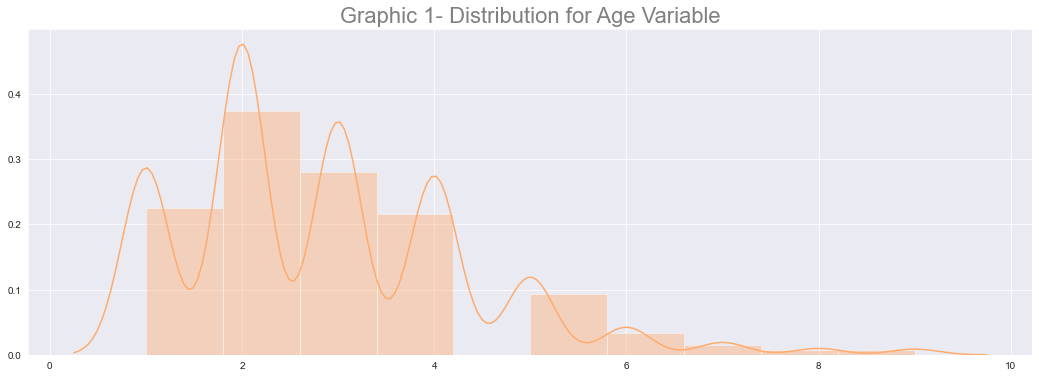

In [17]:
#visualization
graphic1 = sns.distplot(dataset['Family_Size'], bins=10)
configuration(graphic1, 'Graphic 1- Distribution for Age Variable')

- clearlly is not a normal distribution
- needs use non parametric test

In [18]:
#statistic test (mannwhitneyu)
##family_size for each Segmentation
a_family_size = dataset.query('Segmentation=="A"')['Family_Size']
b_family_size = dataset.query('Segmentation=="B"')['Family_Size']
c_family_size = dataset.query('Segmentation=="C"')['Family_Size']
d_family_size = dataset.query('Segmentation=="D"')['Family_Size']

In [19]:
#test if mean of segmentation D is bigger from the other segmentations
_, pvalue_family_d_a = mannwhitneyu(d_family_size, a_family_size, alternative='greater')# DxA
_, pvalue_family_d_b = mannwhitneyu(d_family_size, b_family_size, alternative='greater')# DxB
_, pvalue_family_d_c = mannwhitneyu(d_family_size, c_family_size, alternative='greater')# Dxc
print(f'Result\nPvalue DxA = {pvalue_family_d_a:.3f}\nPvalue DxB = {pvalue_family_d_b:.3f}\nPvalue DxC = {pvalue_family_d_c:.3f}')

Result
Pvalue DxA = 0.000
Pvalue DxB = 0.000
Pvalue DxC = 0.000


- there is no statistic difference with mean of all Segmentation for Family_Size, in other words the Family_Size mean for Segmentation D is not bigger them others segmentations
- I will not include this variable in prediction model

## Conclusion and decisions

- two variables did not present significant difference when compare Segmentations: Family_Size and Gender
- for construction of prediction model these will not be used, only if will be necessary to test all scenarios 